   Row        Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0    1     Sunday            1  9/14/2014      2,146         1,582   
1    2     Monday            2  9/15/2014      3,621         2,528   
2    3    Tuesday            3  9/16/2014      3,698         2,630   
3    4  Wednesday            4  9/17/2014      3,667         2,614   
4    5   Thursday            5  9/18/2014      3,316         2,366   

  First.Time.Visits Returning.Visits  
0             1,430              152  
1             2,297              231  
2             2,352              278  
3             2,327              287  
4             2,130              236  


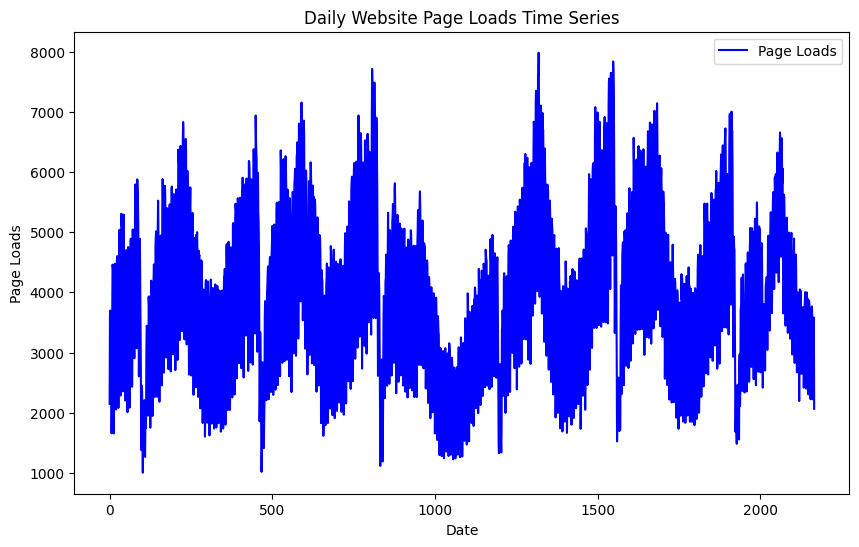

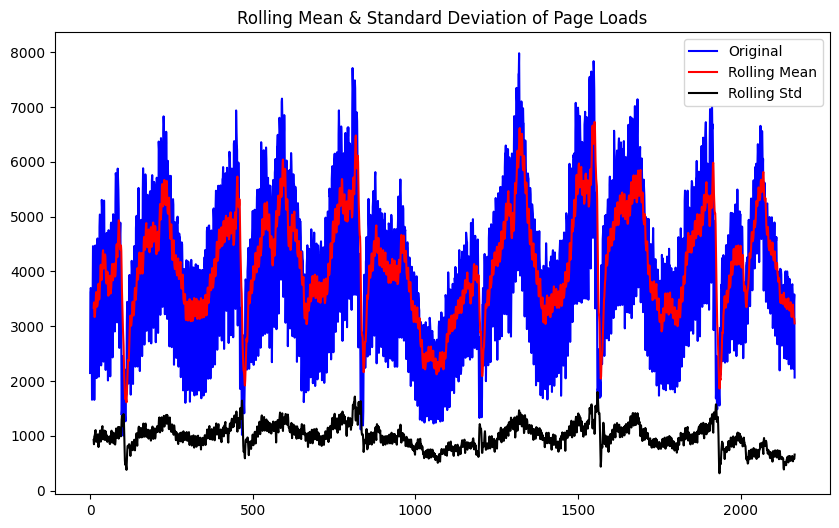

ADF Statistic: -4.283821436187665
p-value: 0.0004737578257465072
Critical Values:
   1%: -3.4334094211542983
   5%: -2.8628915360971003
   10%: -2.5674894918770197
The time series is stationary (reject the null hypothesis).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Load the data
file_path = '/content/drive/MyDrive/TimeSereisDatasets/EX-4/Copy of daily-website-visitors.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Convert the 'Page.Loads' column to numeric by removing commas
data['Page.Loads'] = data['Page.Loads'].str.replace(',', '').astype(float)


# Visualize the rolling statistics
plt.figure(figsize=(10, 6))
rolmean = data['Page.Loads'].rolling(window=12).mean()
rolstd = data['Page.Loads'].rolling(window=12).std()
plt.plot(data['Page.Loads'], color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation of Page Loads')
plt.show()

# Perform Augmented Dickey-Fuller (ADF) test
result = adfuller(data['Page.Loads'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

if result[1] < 0.05:
    print("The time series is stationary (reject the null hypothesis).")
else:
    print("The time series is not stationary (fail to reject the null hypothesis).")

